# Лабораторная работа #1: хэширование

Выполнили: Смольникова Полина, Макридин Максим

Рассмотренные алгоритмы: 
* хэширование цепочками 🔗
* хэширование по методу открыой адресации
    * Линейное перехэширование
    * Двоичное перехэширование
    * Квадратичное перехэширование
* метод кукушки 🐦

Алгоритмы написаны на `C++`  
Юнит-тесты реализованы с помощью Google Tests
Тестирование производительности производилось на таблице 4n размера относительно кол-ва используемых элементов размера n.  
Данные производительности записывались в `.csv`-файлы и визуализировались в `Python`

[Ссылка на репозиторий с кодом, тестами и маленьким CI](https://github.com/mmakridi/hashes)


## int-ы

$h_{a, b}(x) = ((ax + b)mod 2^w)div2^{w - M}$

$w$ - размер машинного слова, $w = 32, 64, 128$ 

$m = 2^M$ - размер таблицы

$a \in \left\{ 0, 1, .., 2^w -1 \right\}, нечетное$

$b \in \left\{0, .., 2^{w - M} - 1\right\}$

In [215]:
import csv
import matplotlib.pyplot as plt


def get_x_ydict_from_csv(filename: str):
    hash_insert_int = {}
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            key = row[0]
            hash_insert_int[key] = list(map(int, row[1:]))
            # print(len(row))
    keys = list(hash_insert_int.keys())
    indices = [i for i in range(len(hash_insert_int[keys[0]]))]
    return indices, hash_insert_int
# maximum = max([max(hash_insert_int[key]) for key in keys])
# maximum

def print_dict_performance():
    pass

### Вставка int-ов

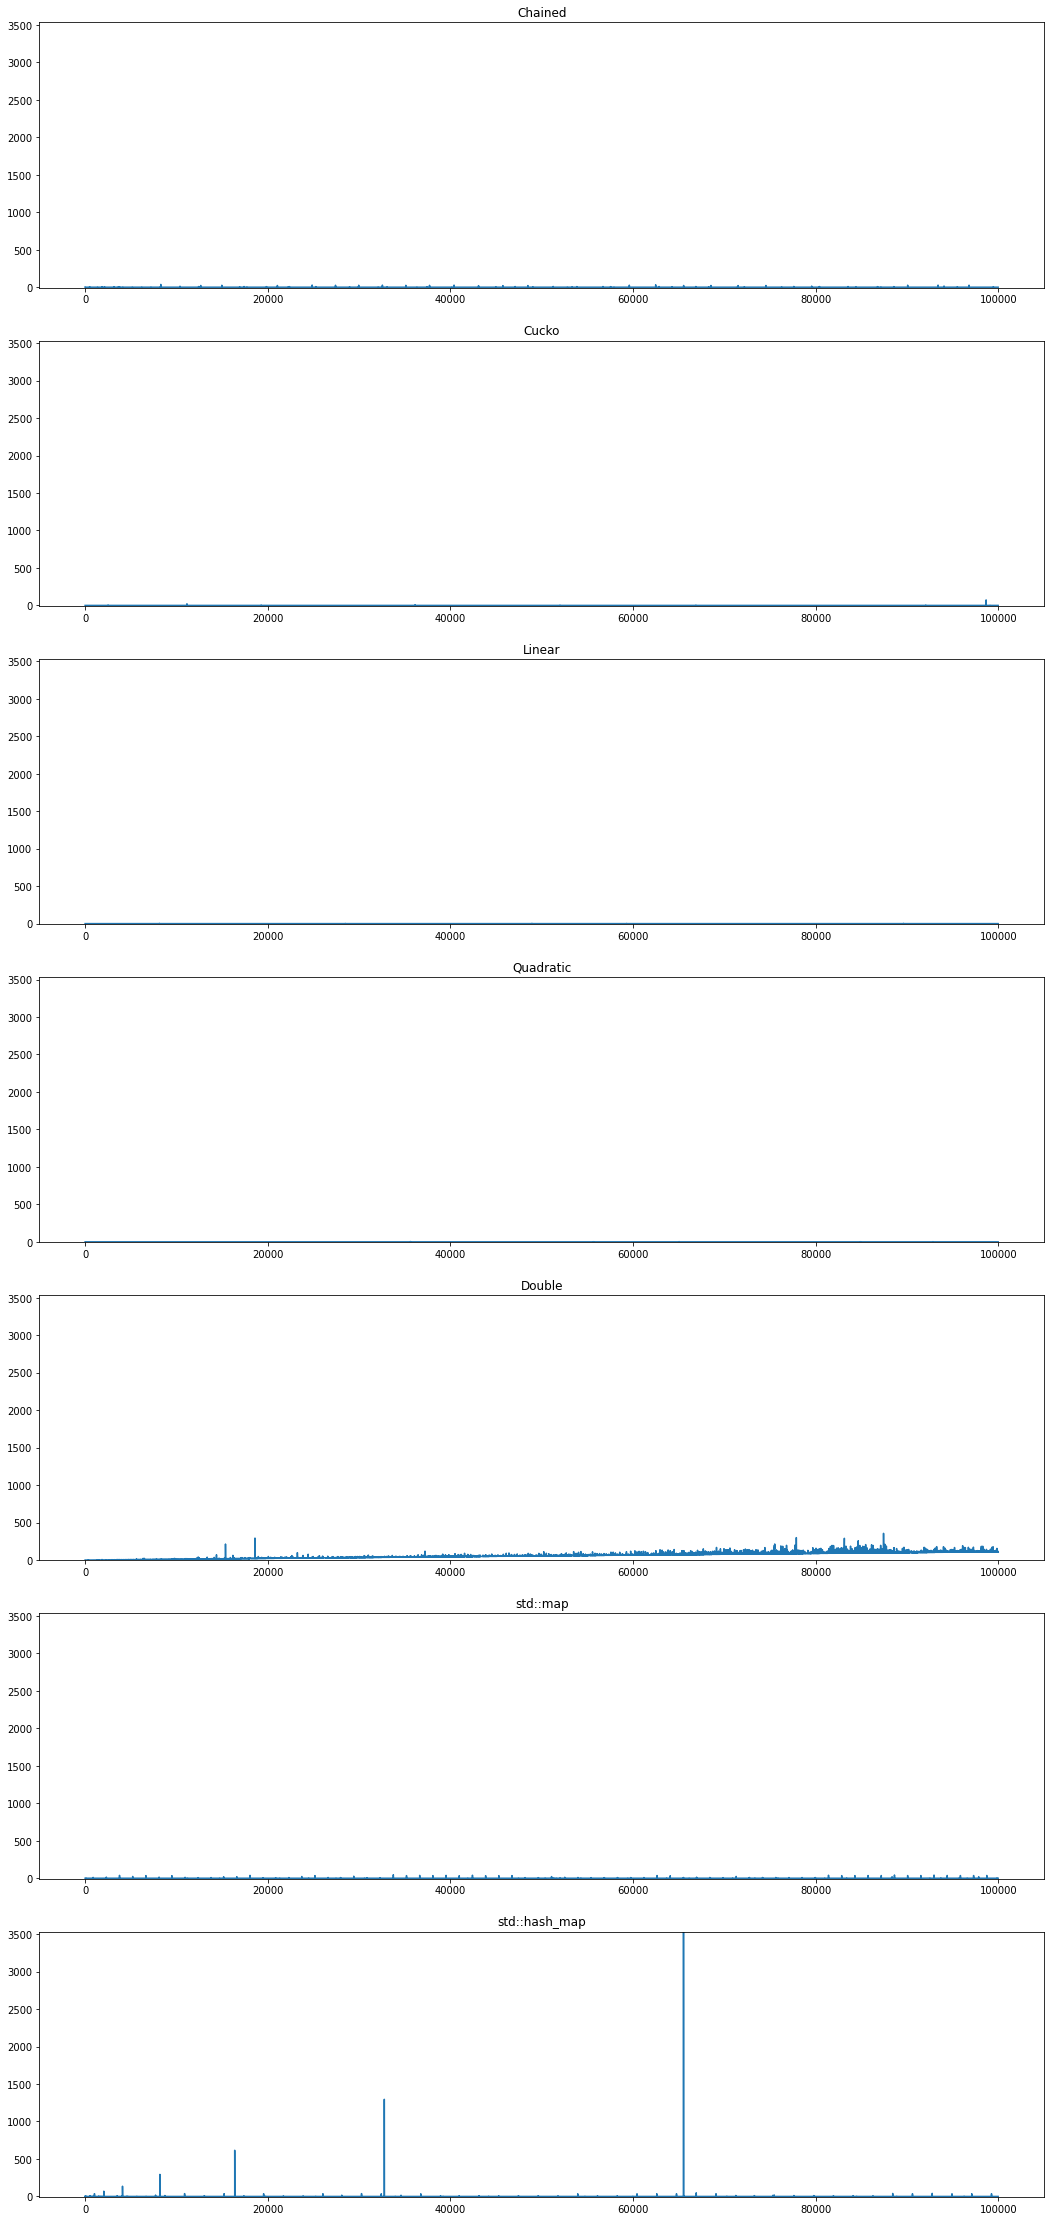

In [229]:
indices, data = get_x_ydict_from_csv('data/hash_insert_int.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in []:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Поиск int-ов

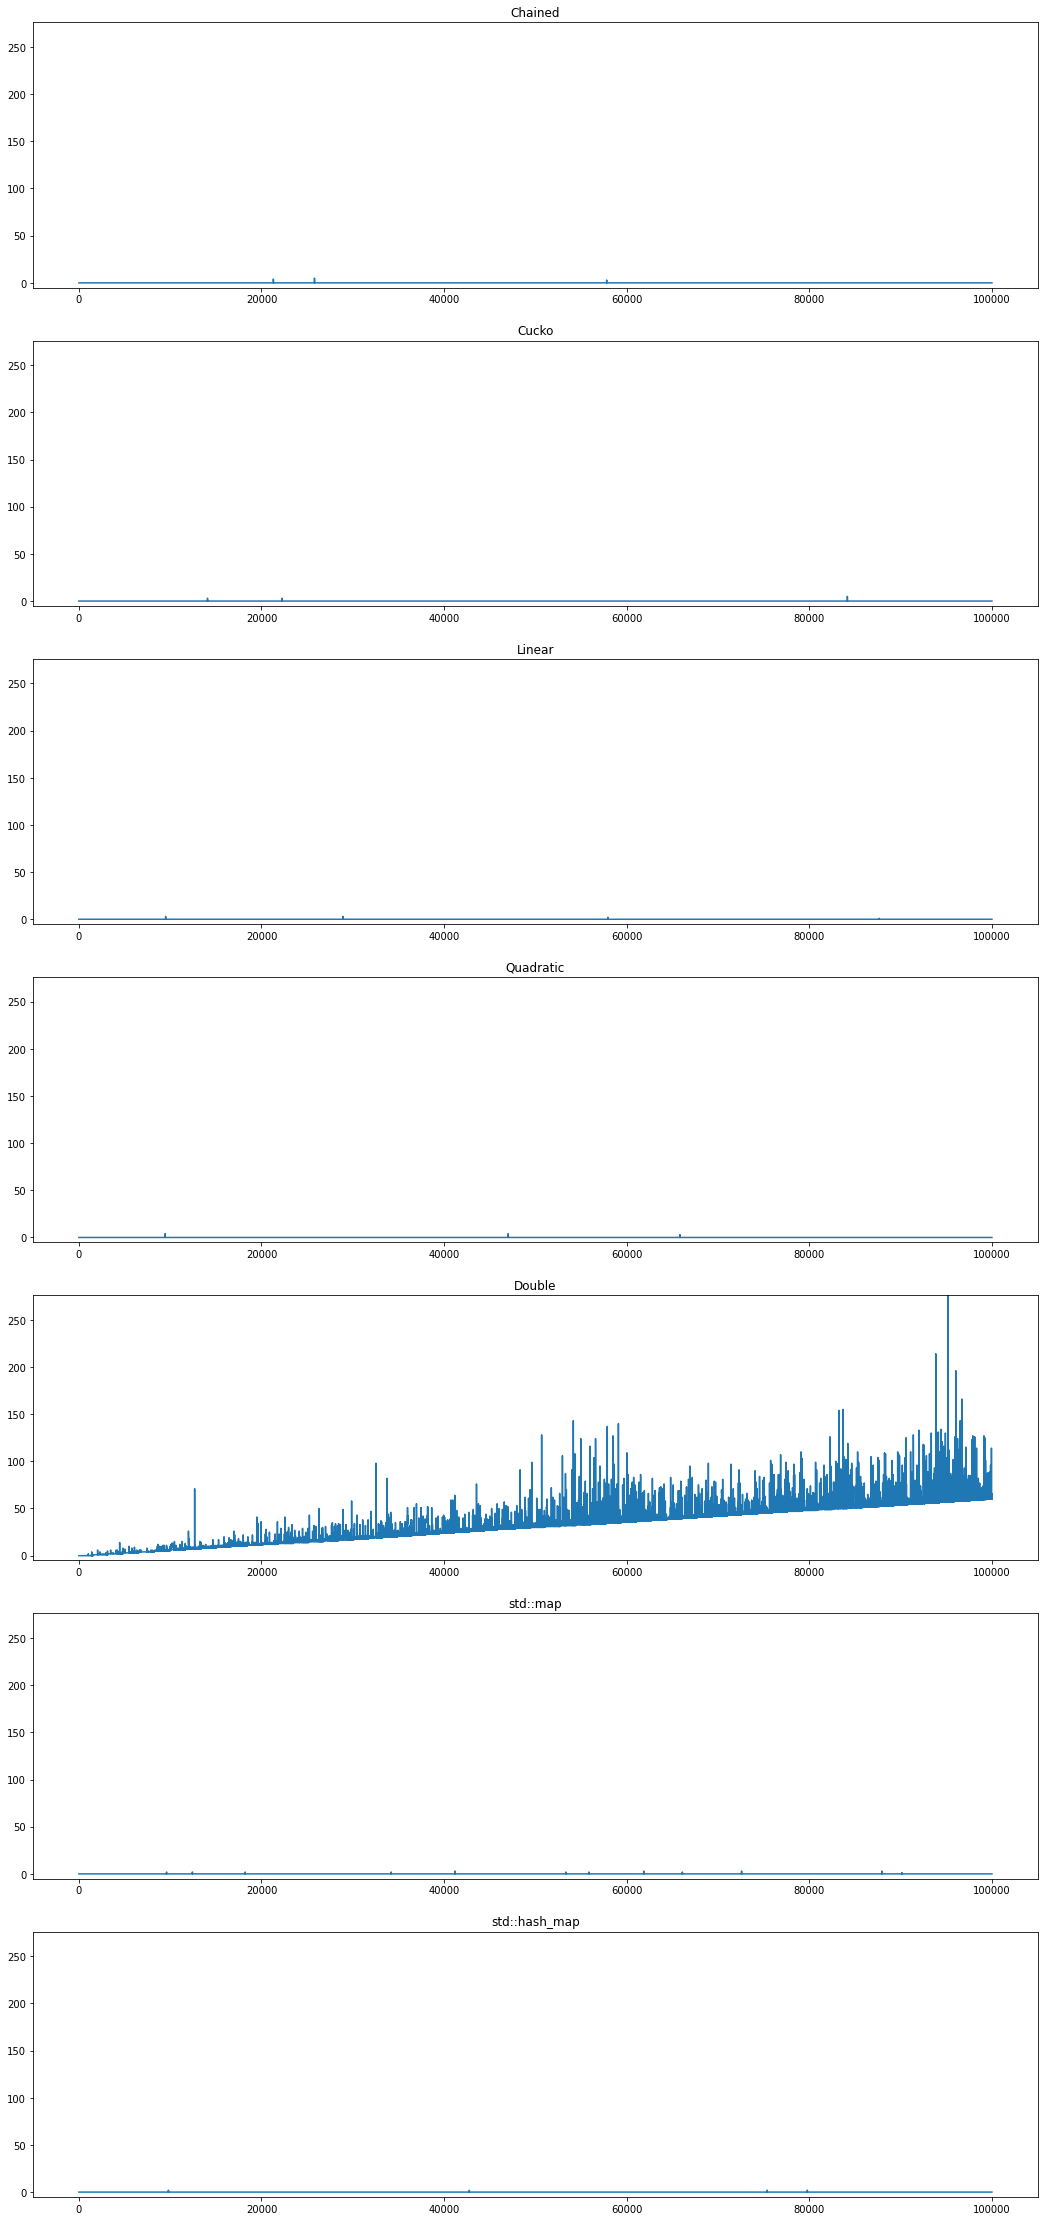

In [230]:
indices, data = get_x_ydict_from_csv('data/hash_find_int.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in []:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Удаление int-ов

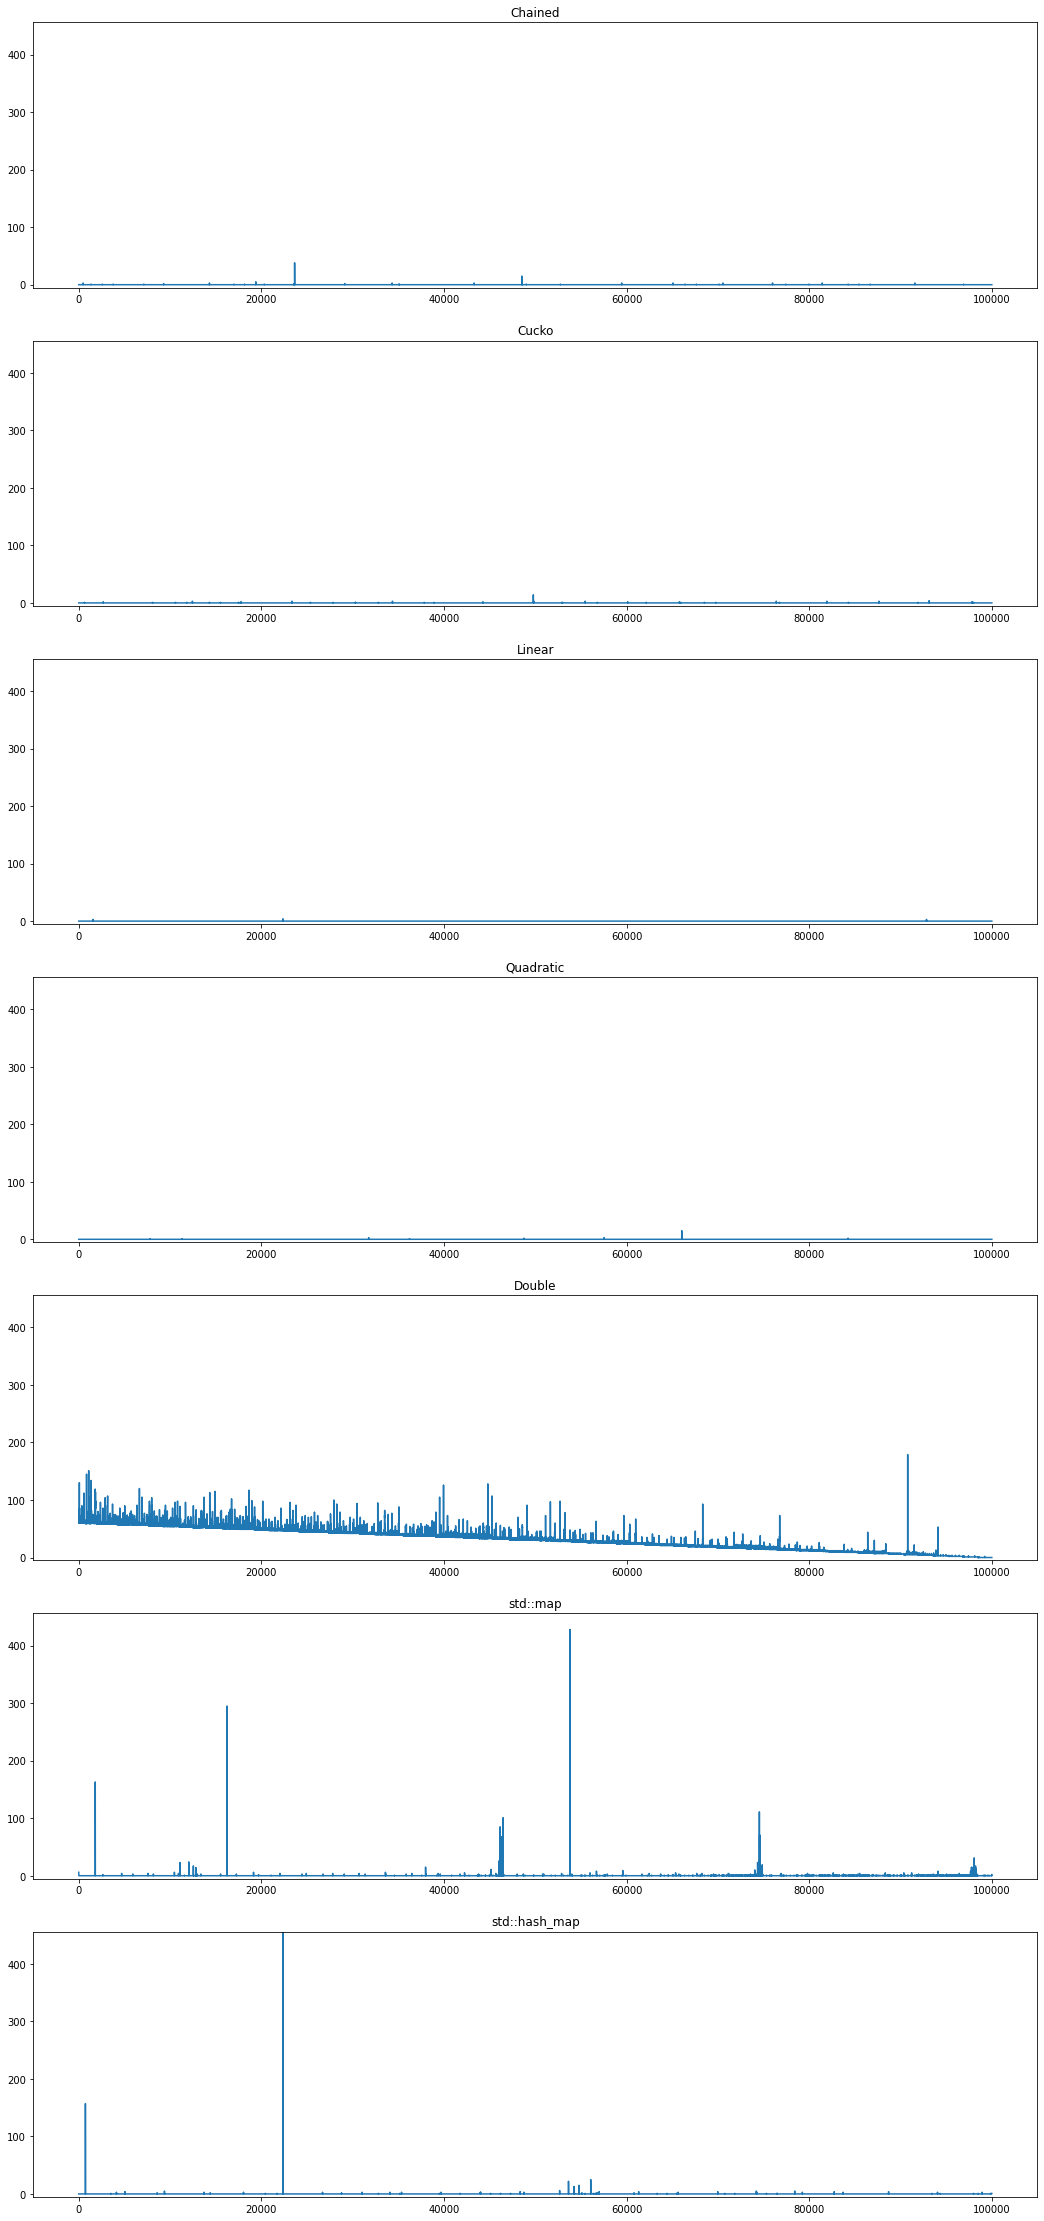

In [231]:
indices, data = get_x_ydict_from_csv('data/hash_erase_int.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in []:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

## std::string-и

$x = (x_0, x_1, .., x_{s-1})$

$h_a(x) = (\sum(a^ix_i)modp)modm$

$a \in \left\{0, 1, .., p-1 \right\}$

$p$ - большое простое число, $m$ - размер таблицы 

### вставка std::string-ов

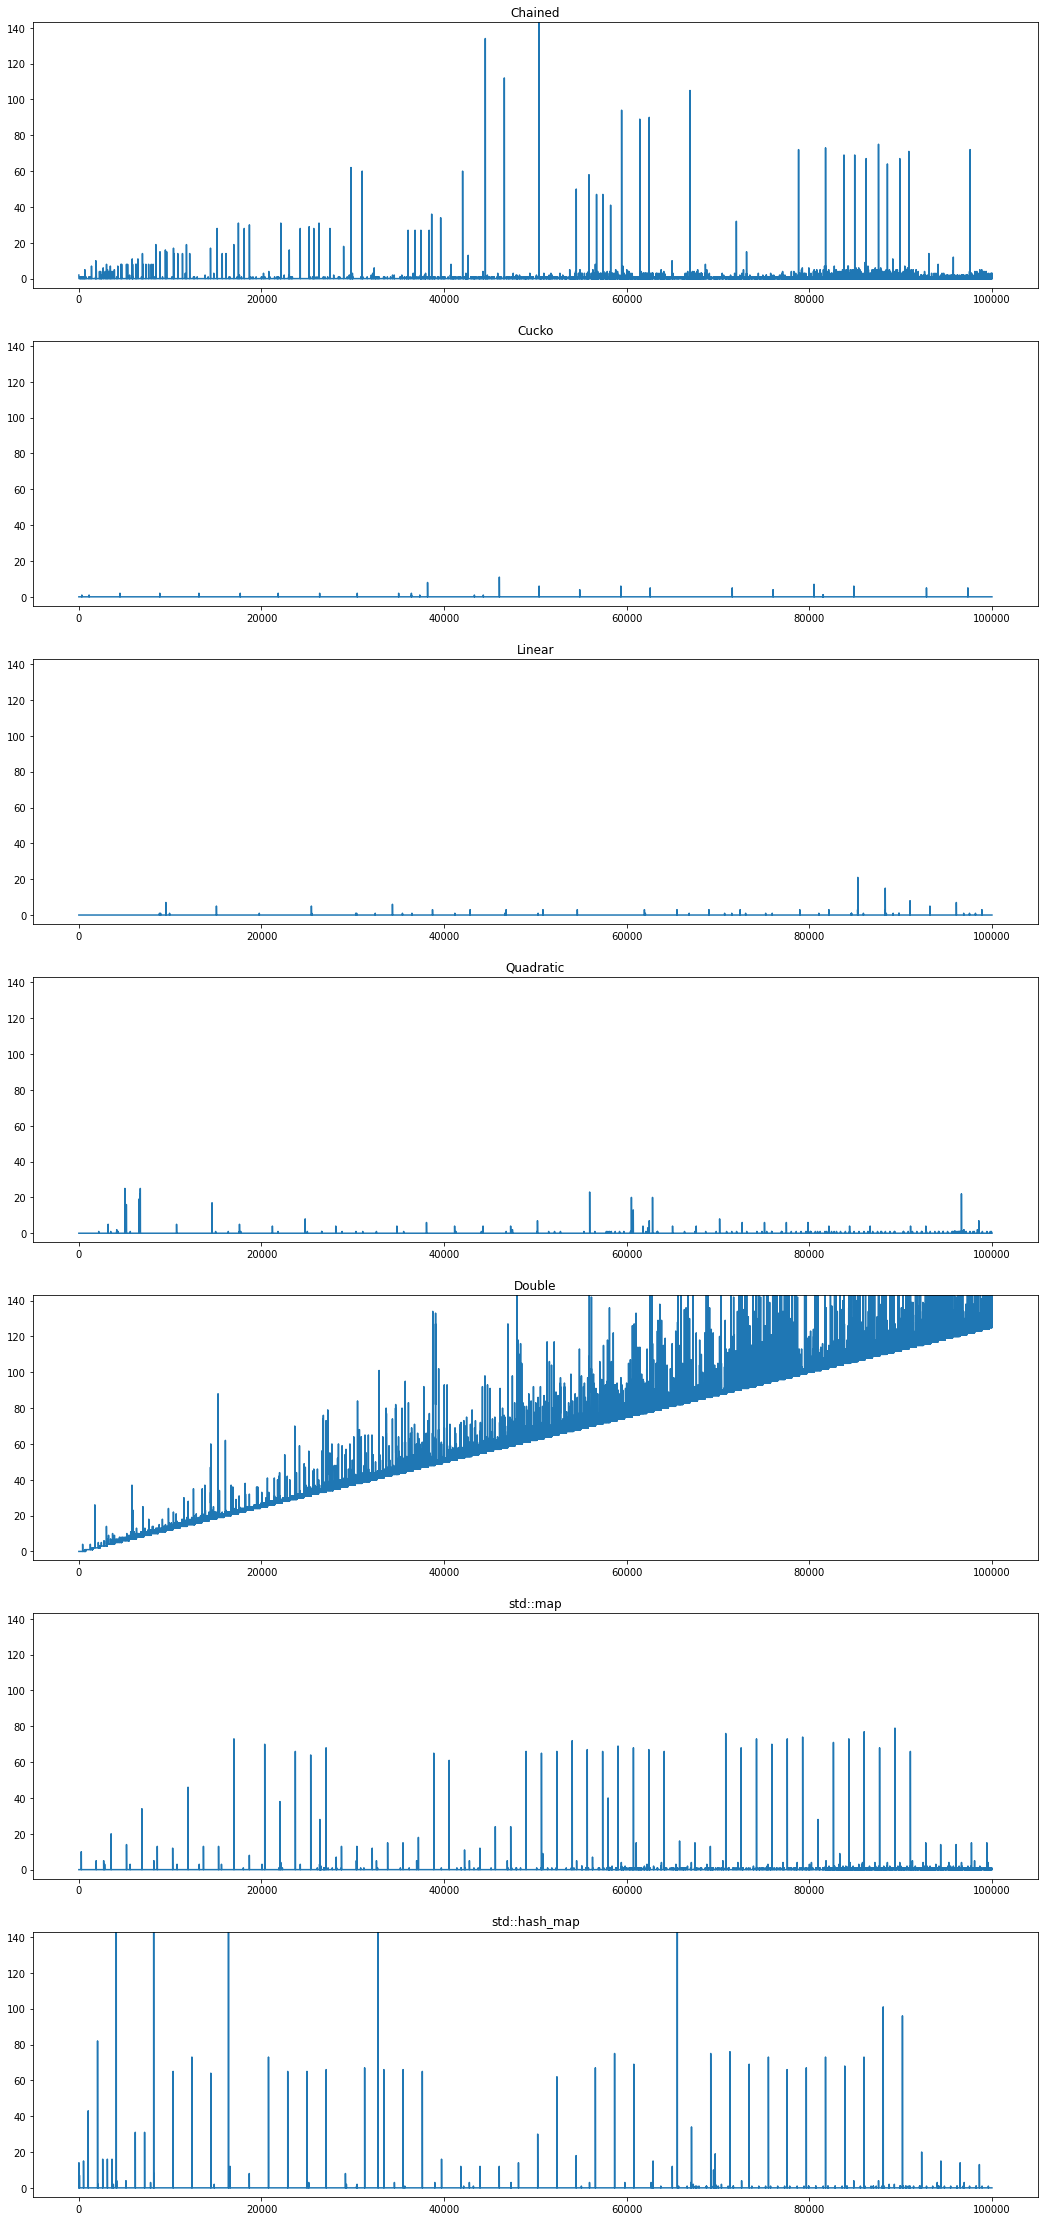

In [205]:
indices, data = get_x_ydict_from_csv('data/hash_insert_string.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in ['std::hash_map', 'Double']:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### поиск std::string-ов

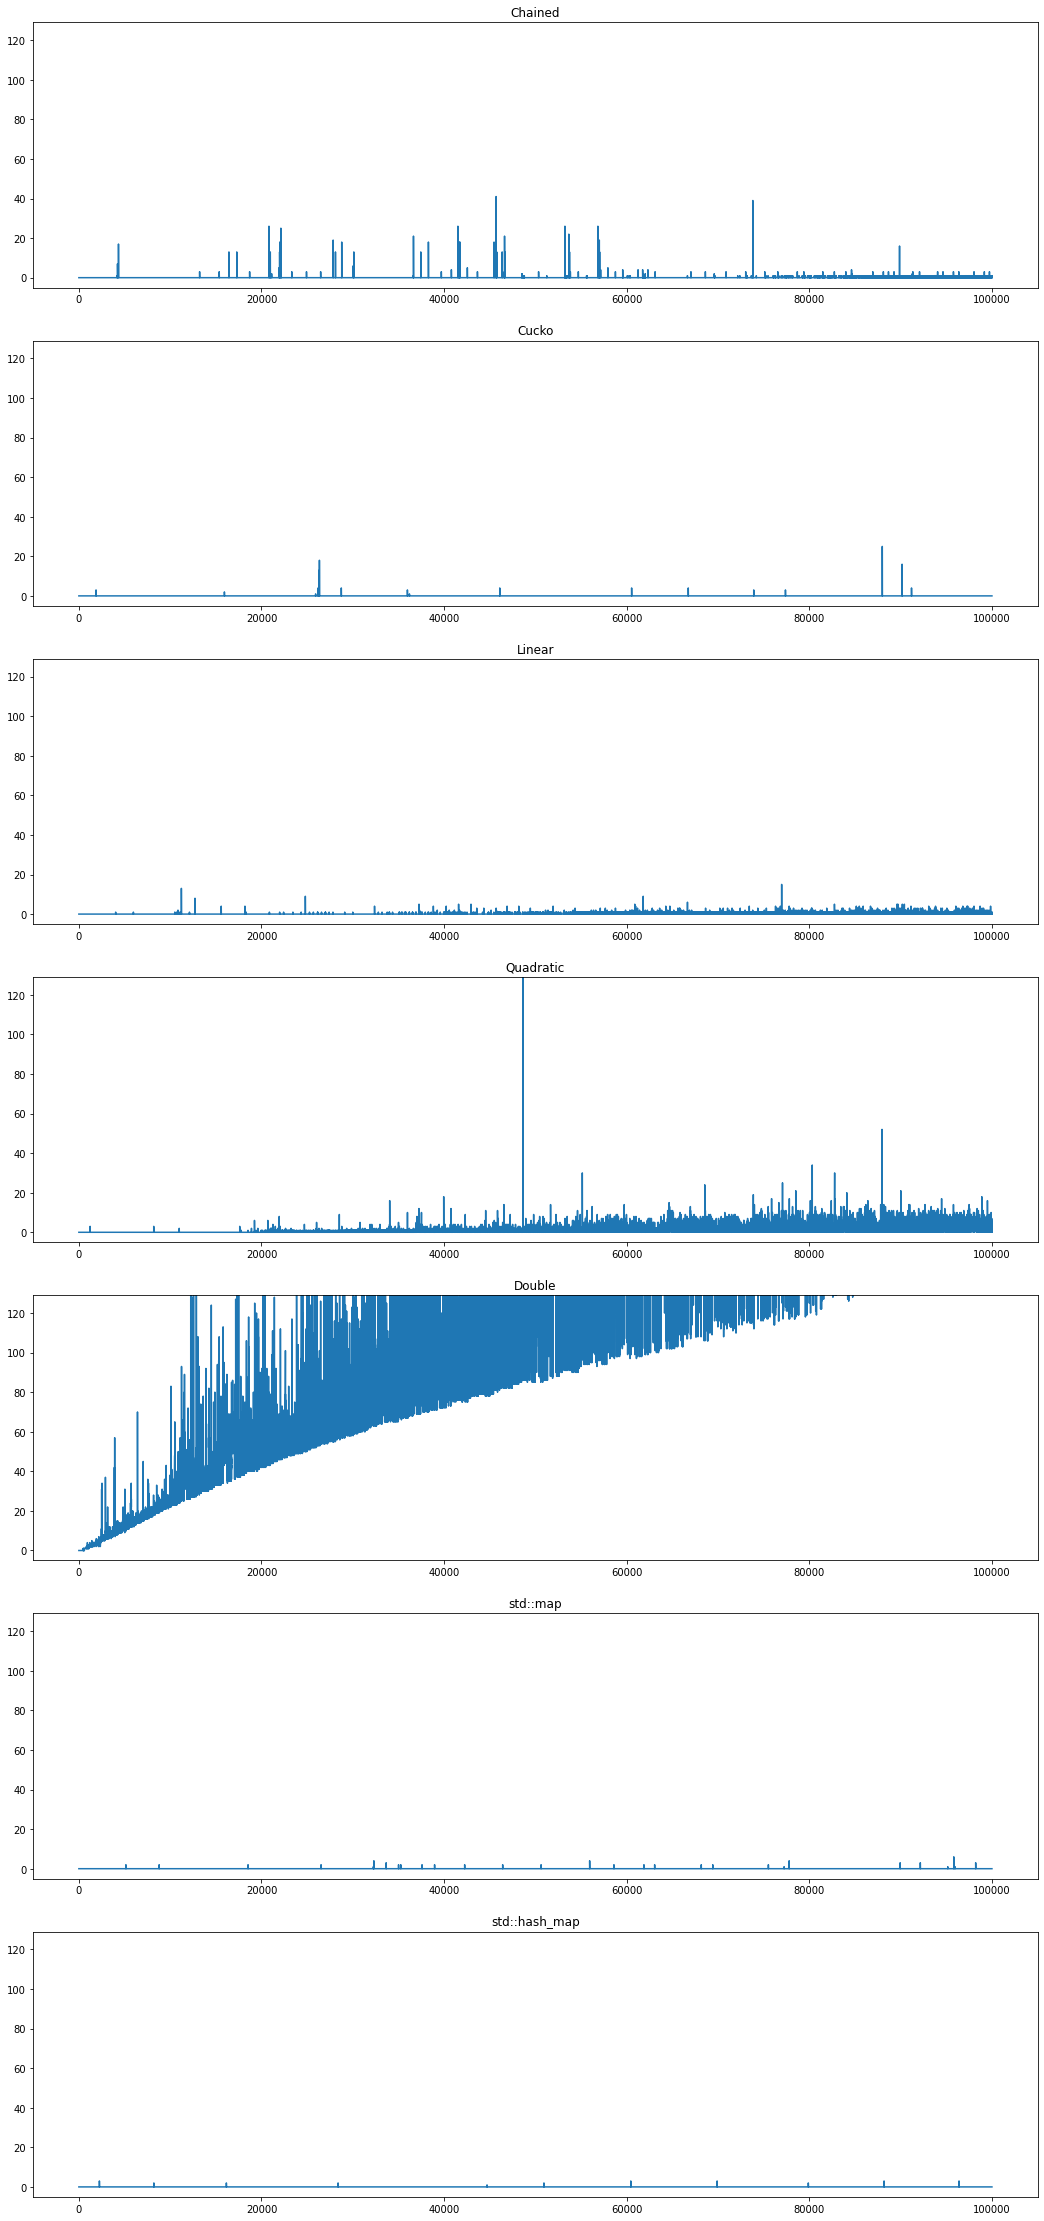

In [145]:
indices, data = get_x_ydict_from_csv('data/hash_find_string.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in ['Double']:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Удаление std::string-ов

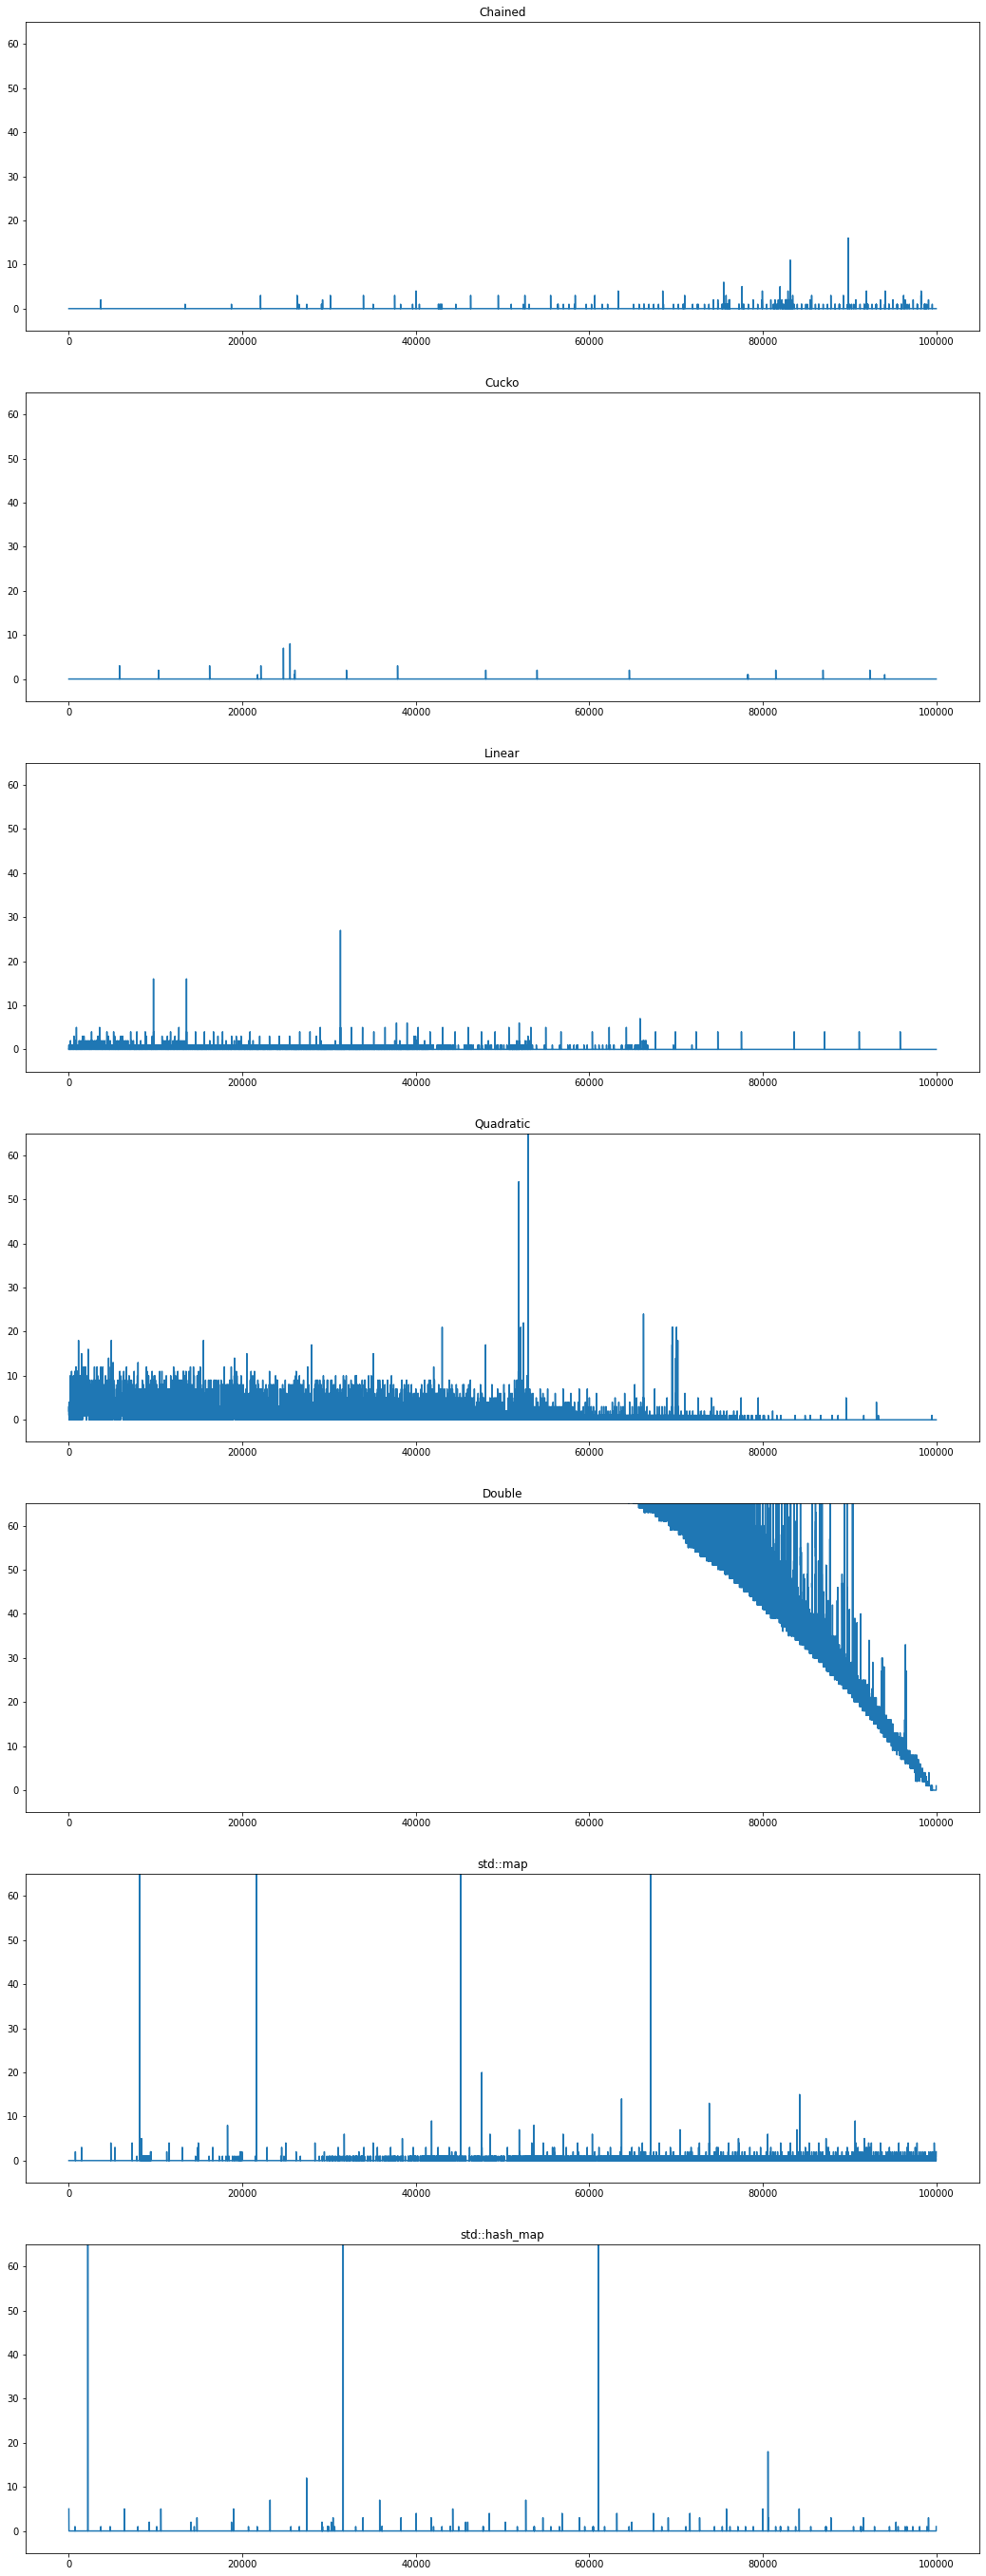

In [148]:
indices, data = get_x_ydict_from_csv('data/hash_erase_string.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in ['Double', 'std::map', 'std::hash_map']:
        maximum = max(data[key])

fig, plots = plt.subplots(len(keys), 1, figsize=(18, 7*len(keys)))
fig.patch.set_facecolor('xkcd:white')
for i in range(len(keys)):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

## Real-life std::string-и
Просто словарь отсортированных в алфавитном порядке слов

### Вставка

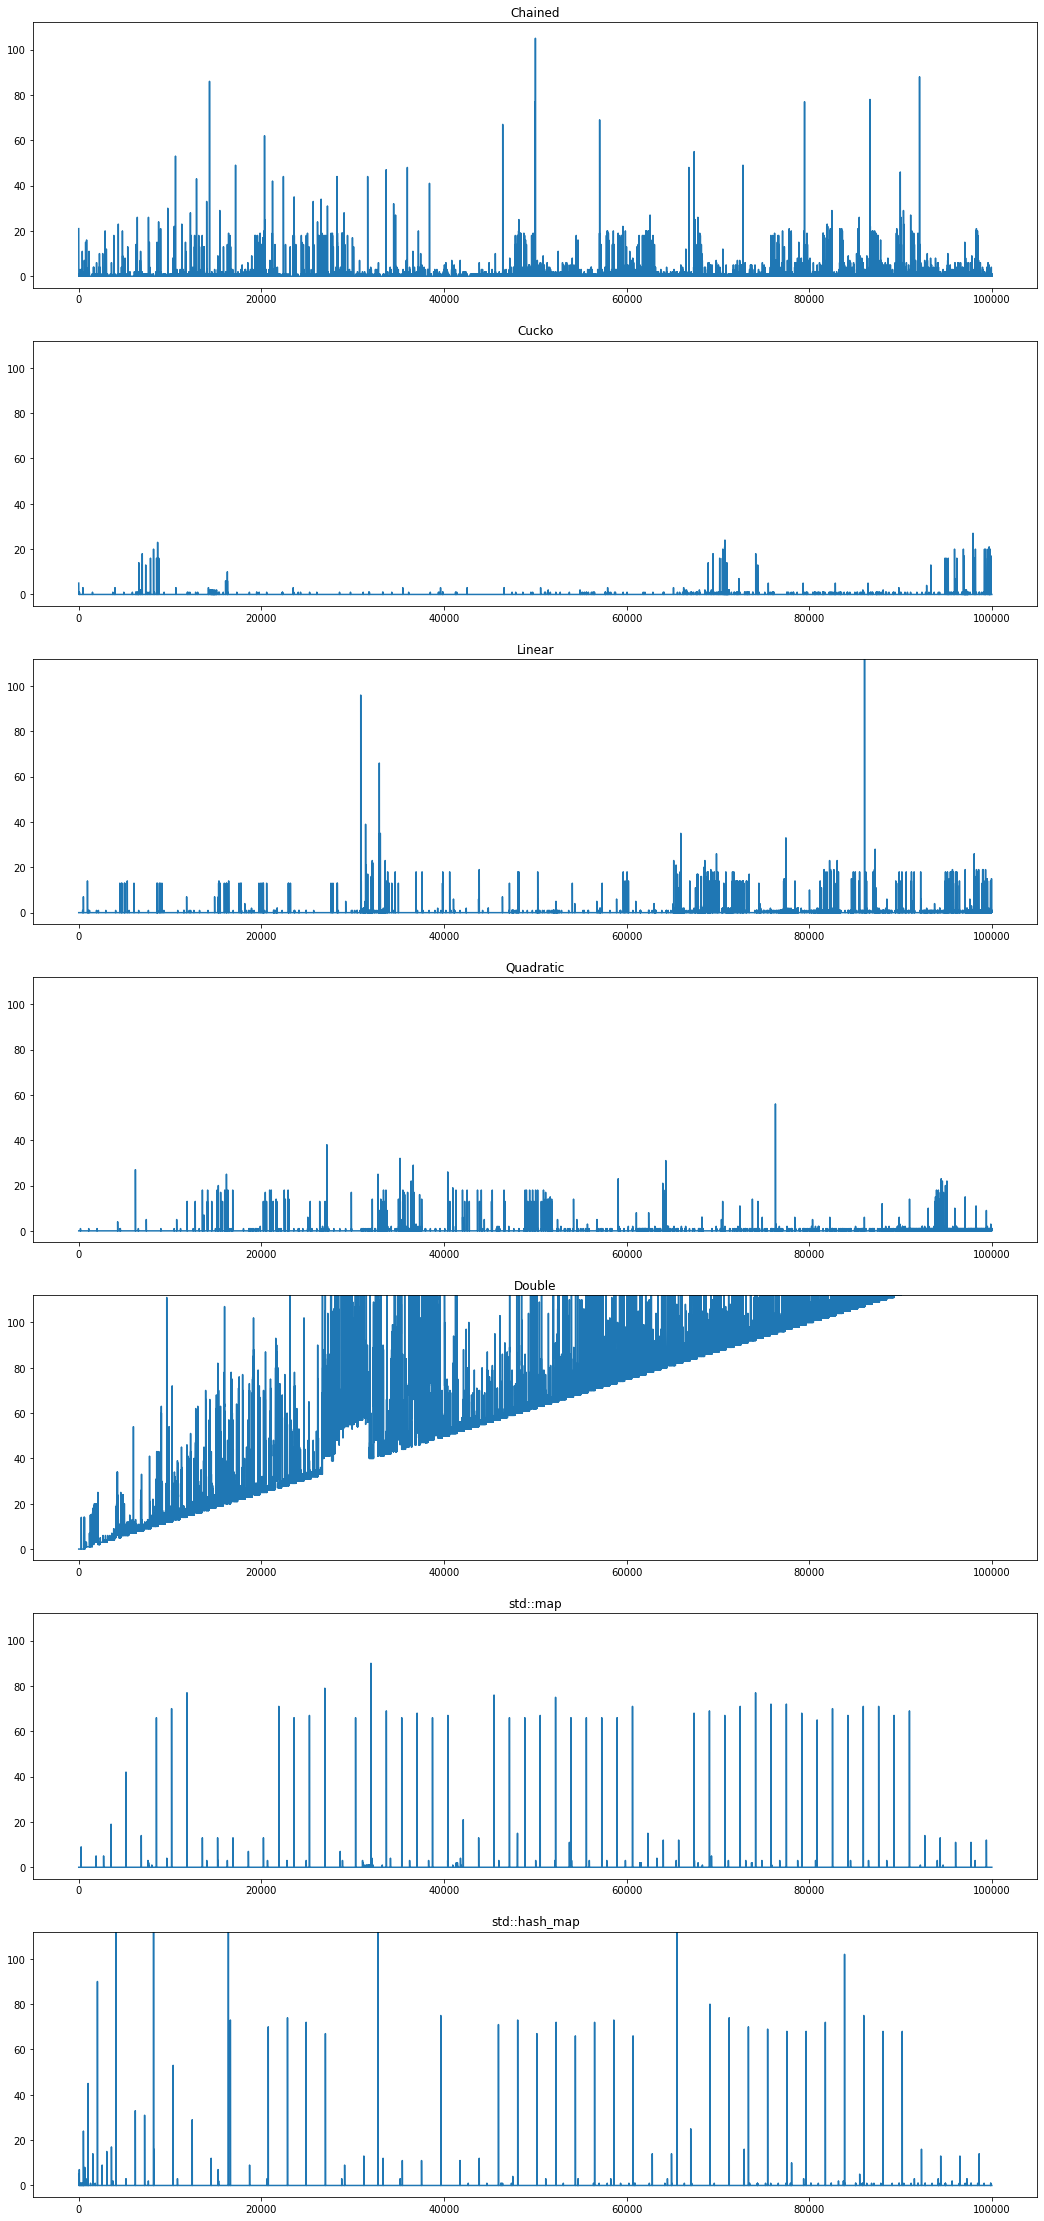

In [166]:
indices, data = get_x_ydict_from_csv('data/hash_insert_real_data.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in ['std::hash_map', 'Double']:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Поиск

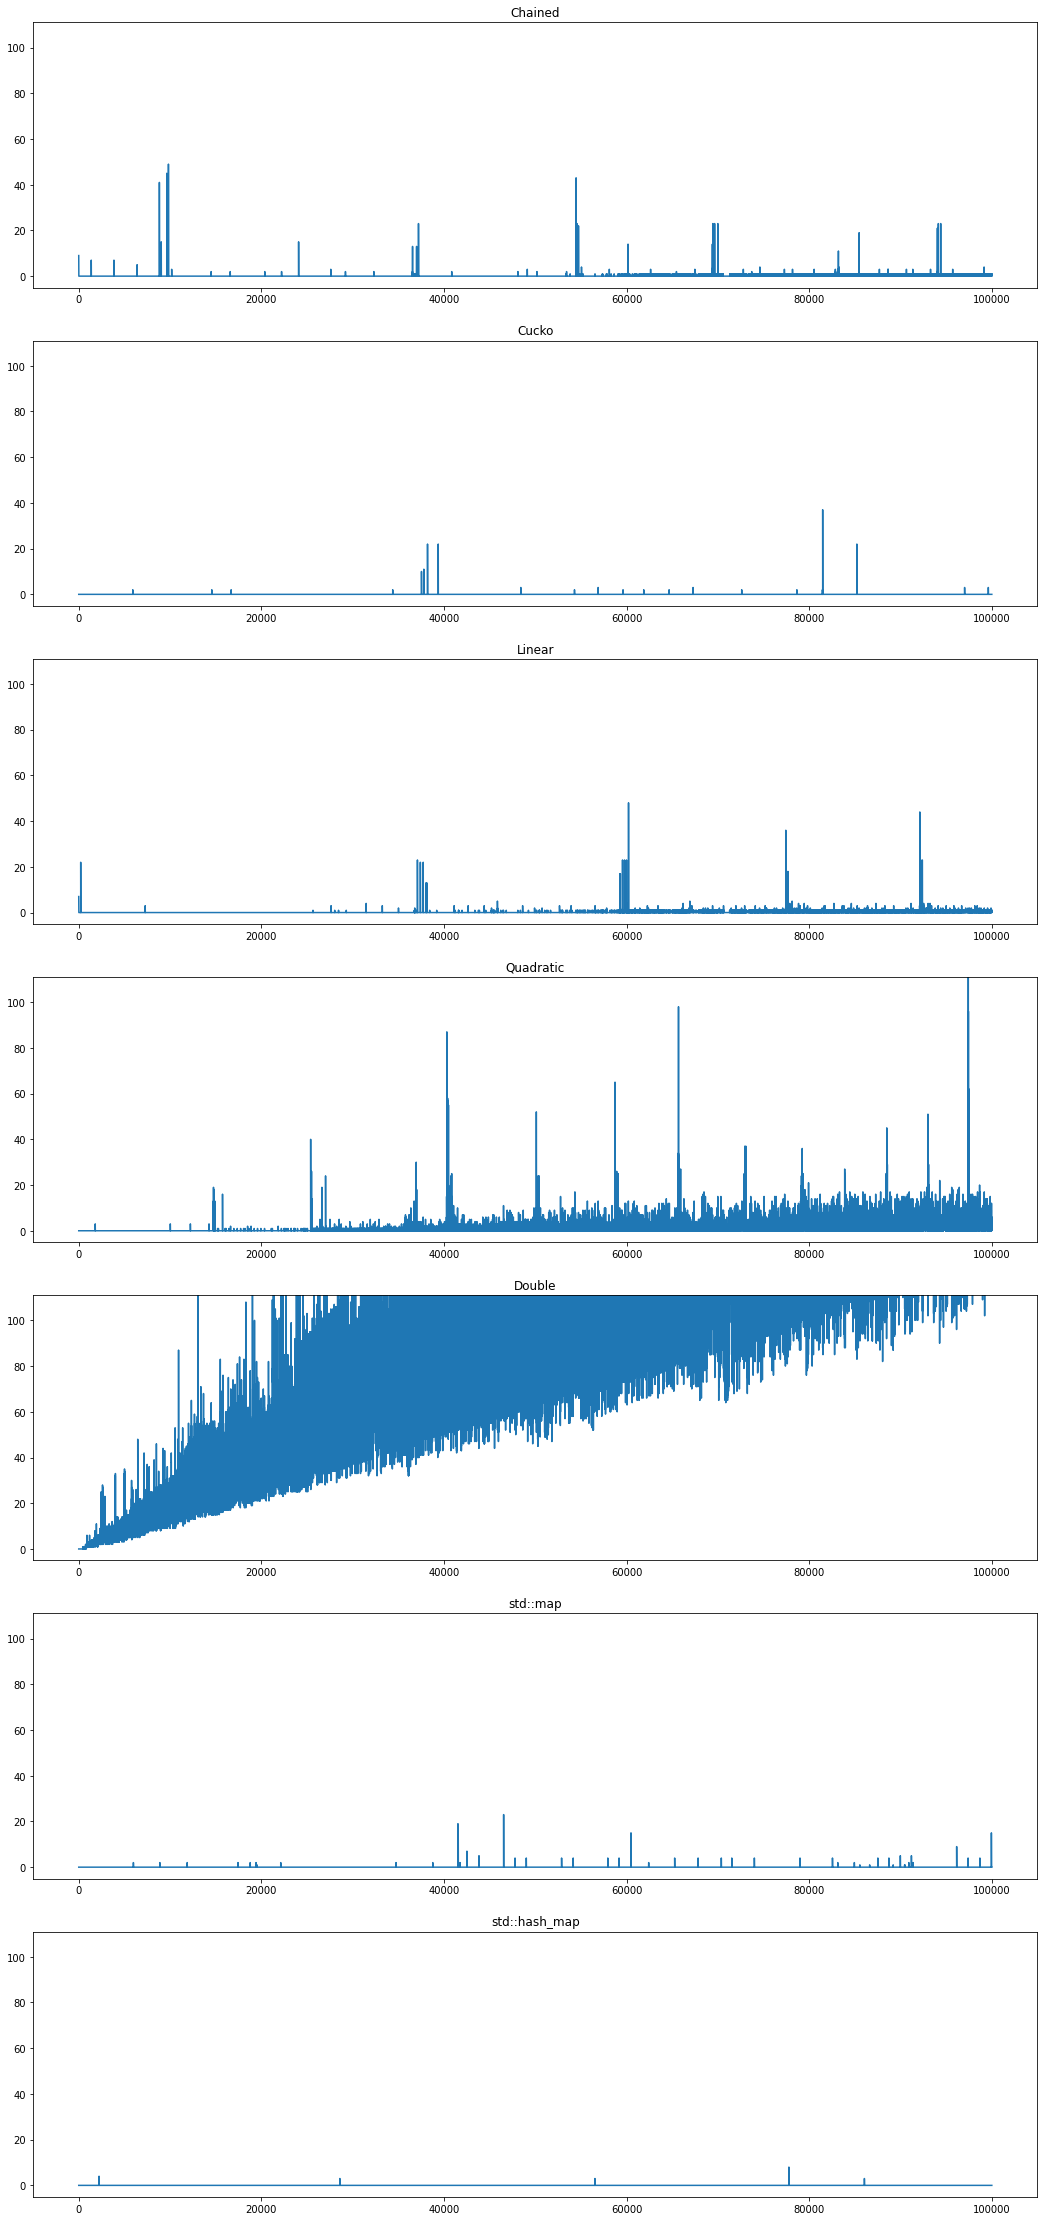

In [167]:
indices, data = get_x_ydict_from_csv('data/hash_find_real_data.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in ['Double']:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Удаление

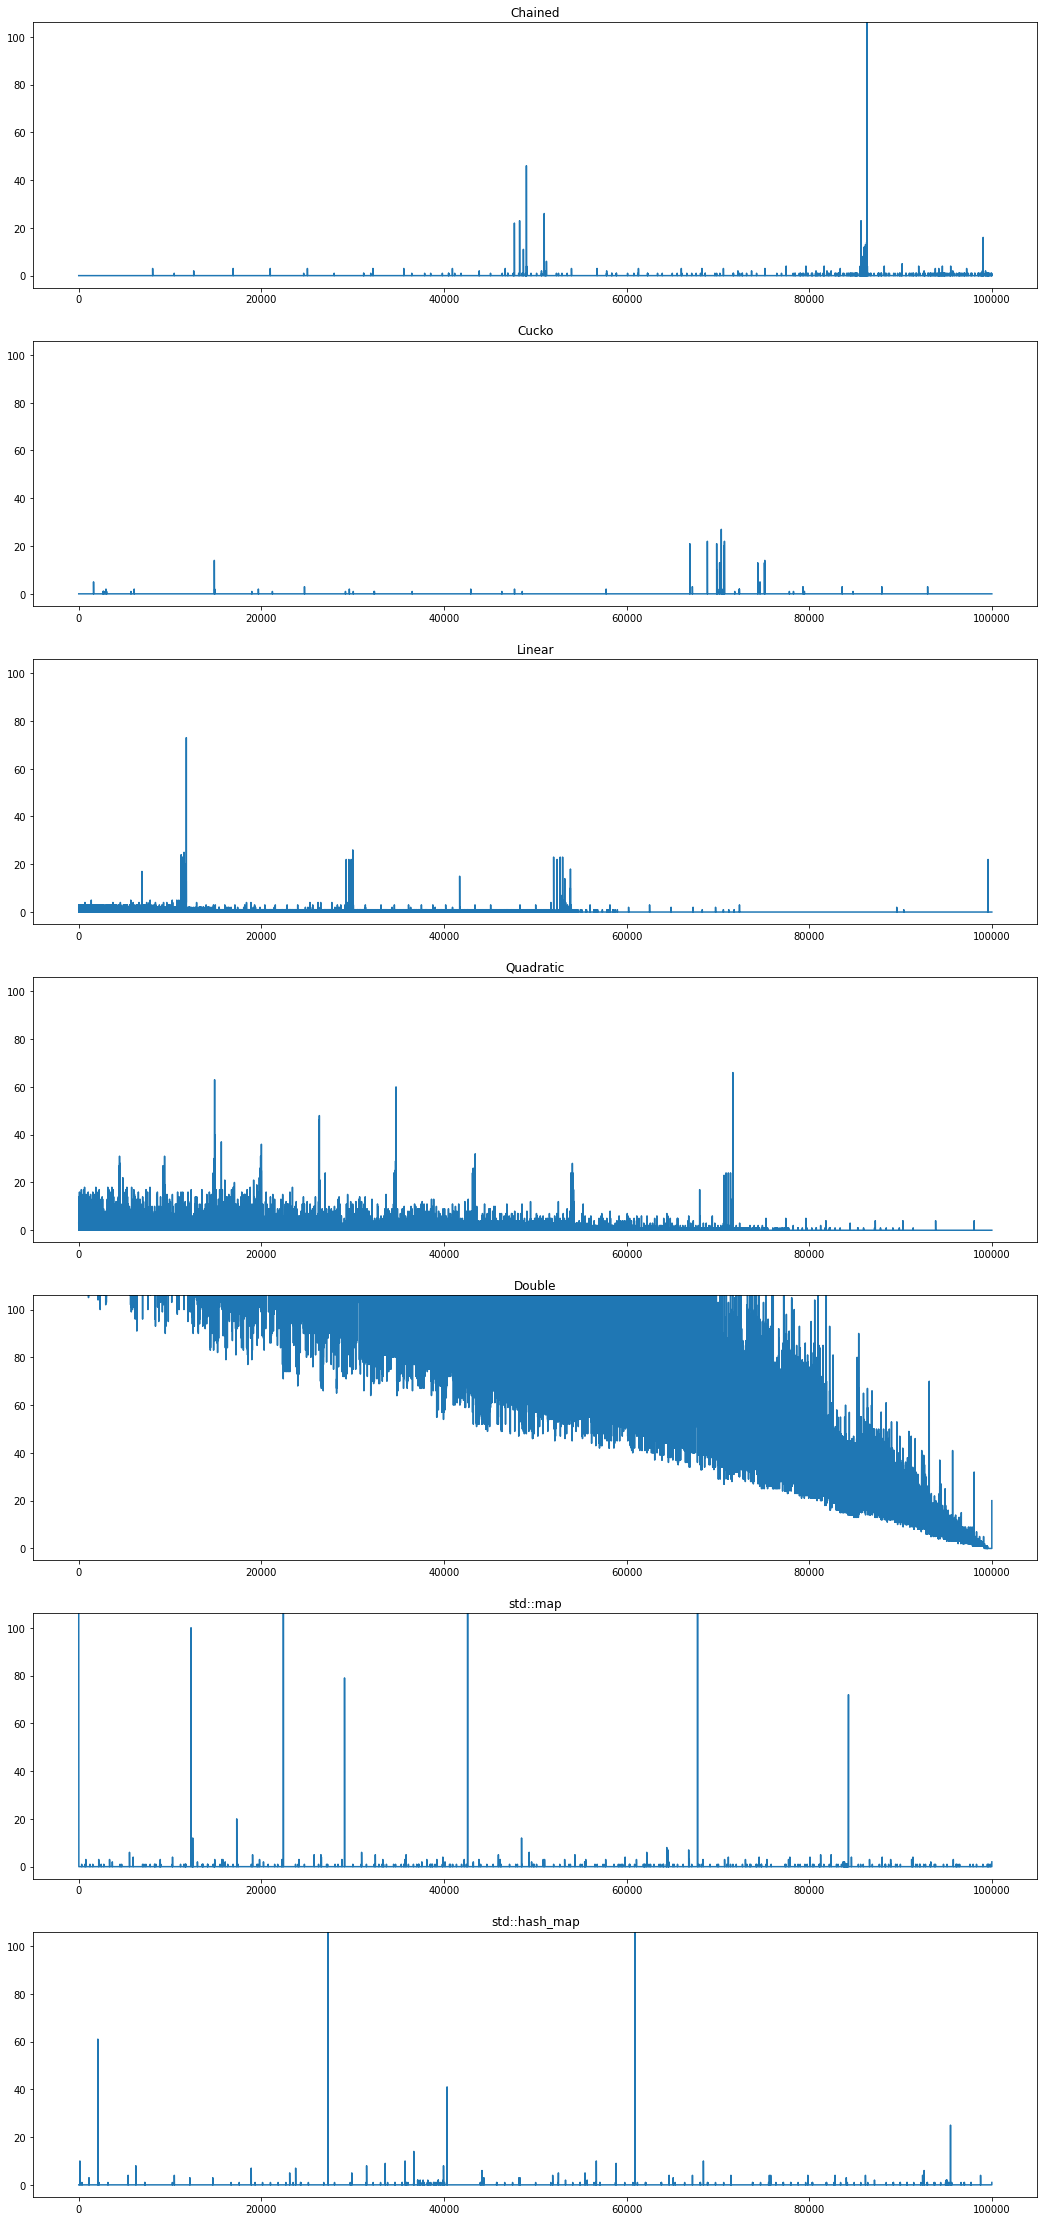

In [192]:
indices, data = get_x_ydict_from_csv('data/hash_erase_real_data.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in ['Double', 'std::hash_map', 'std::map']:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(7):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Вставка в кукушку различной степени

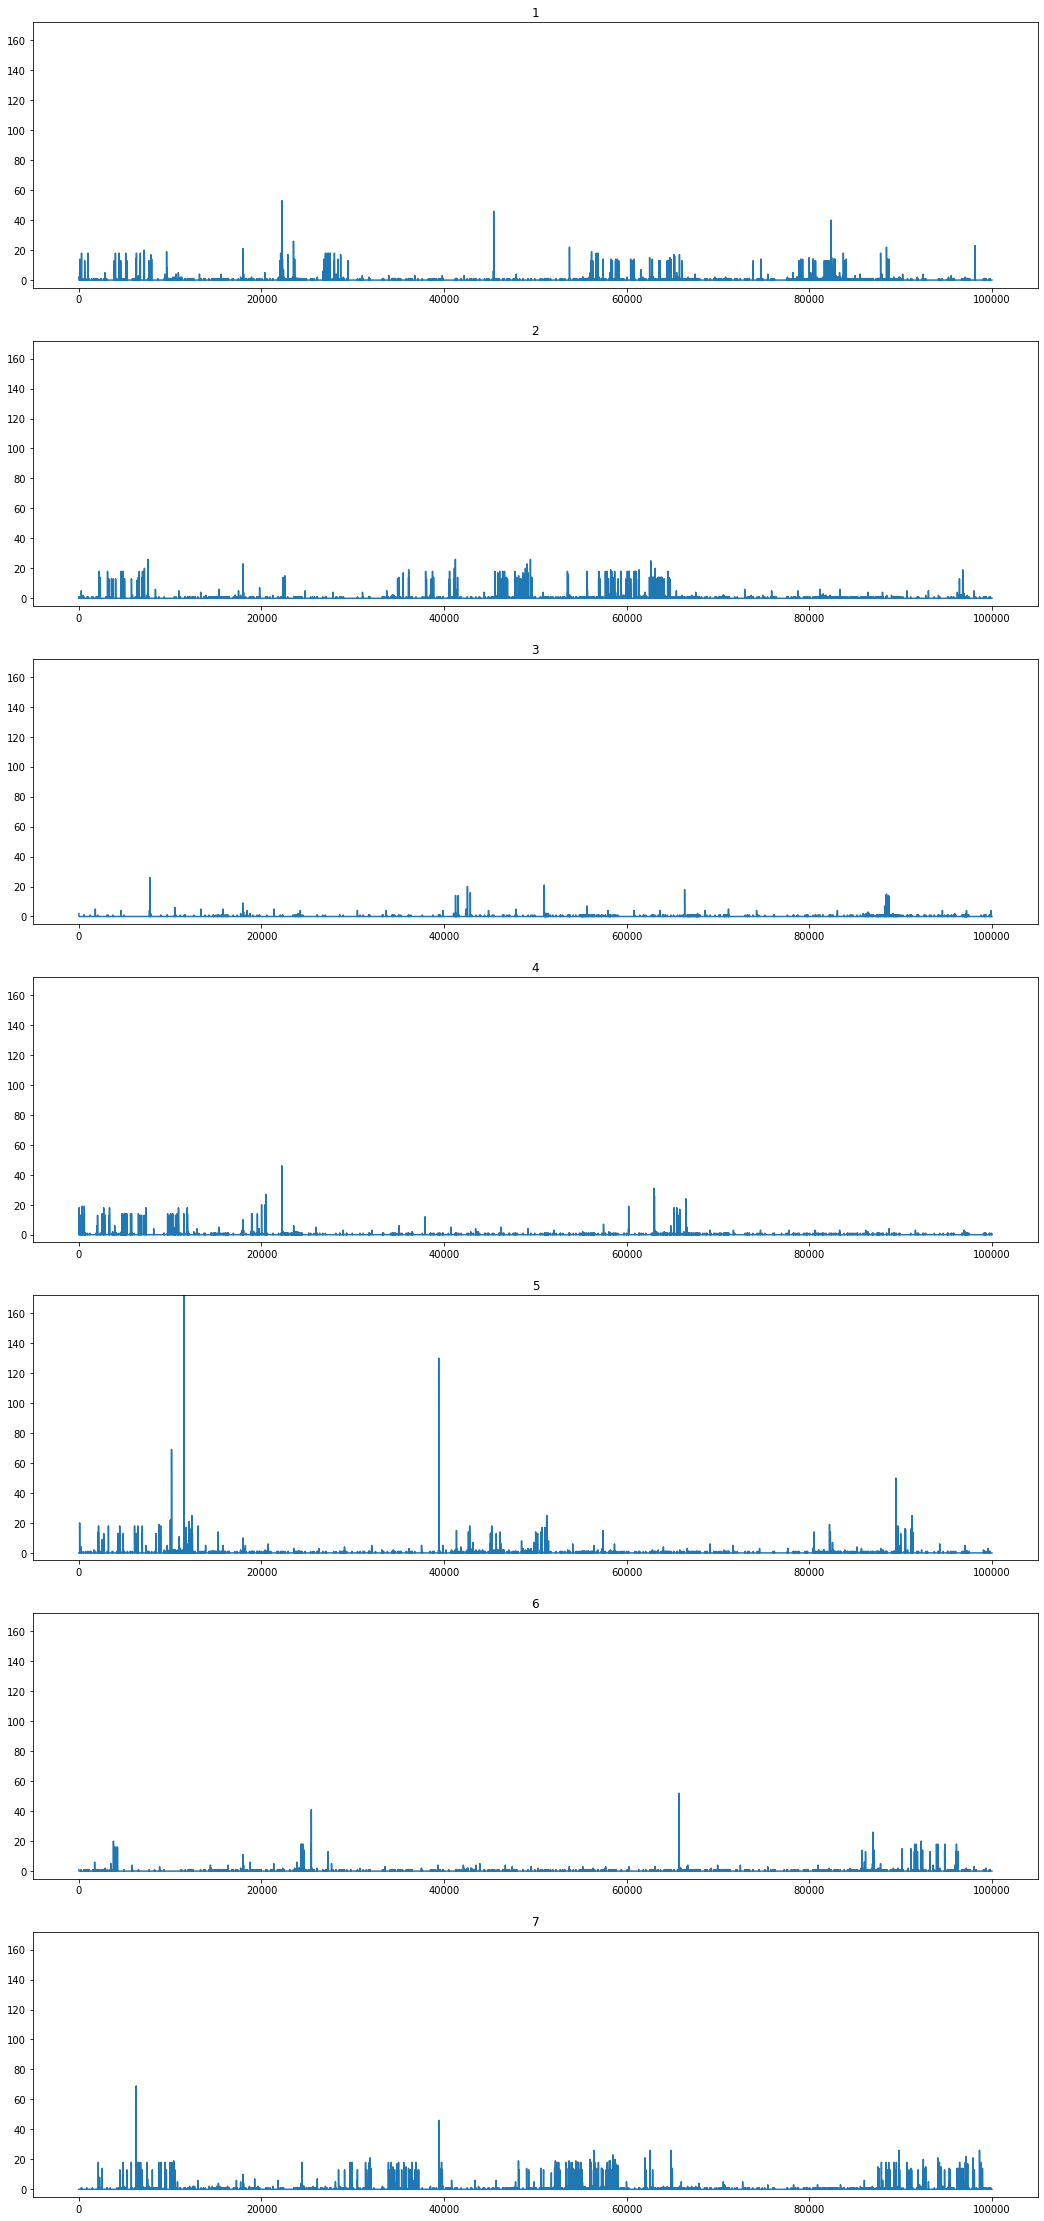

In [214]:
indices, data = get_x_ydict_from_csv('data/hash_insert_real_data_cuckoo_degrees.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in []:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(len(keys)):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Чтение из кукушки различной степени

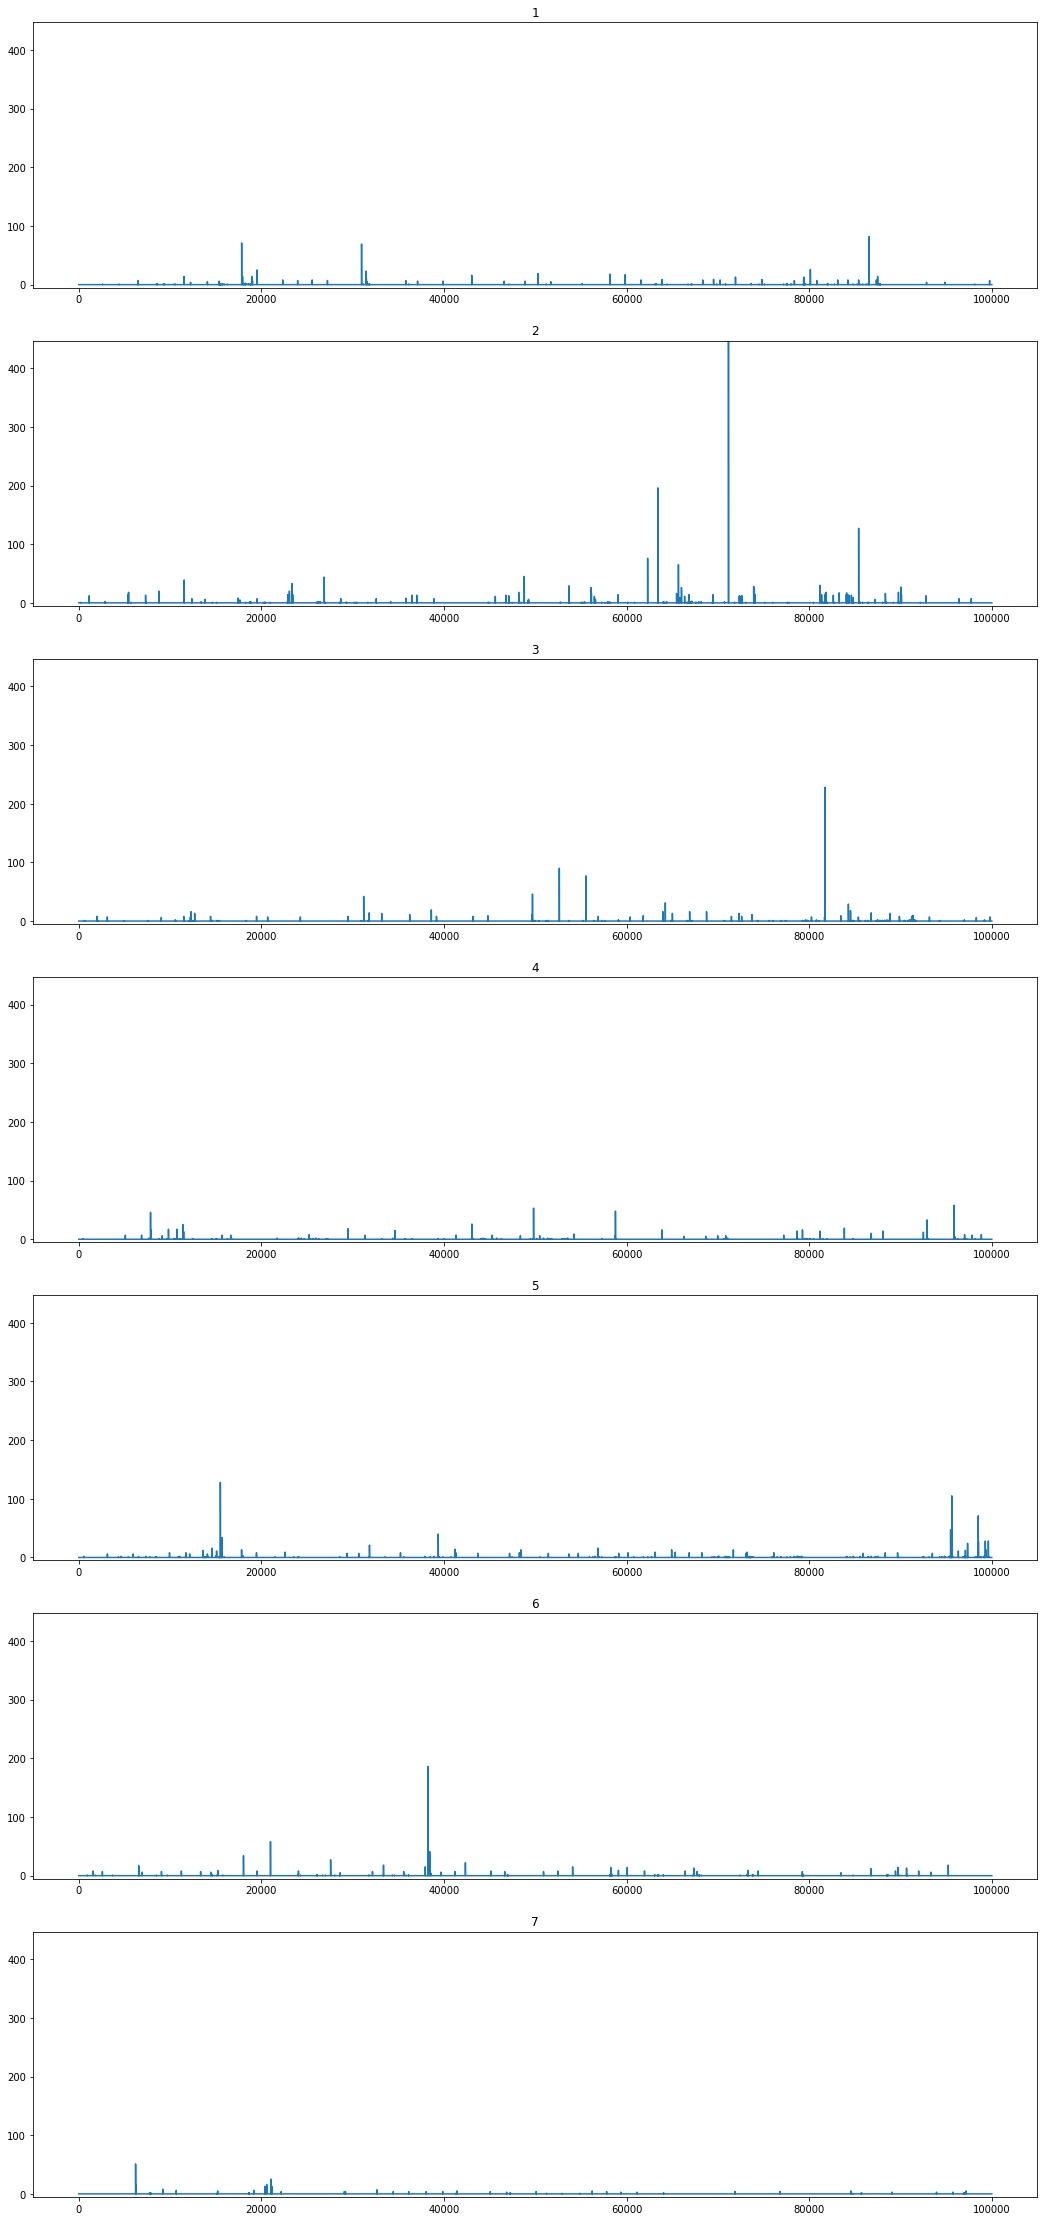

In [203]:
indices, data = get_x_ydict_from_csv('data/hash_find_real_data_cuckoo_degrees.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in []:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(len(keys)):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

### Удаление из кукушки различной степени

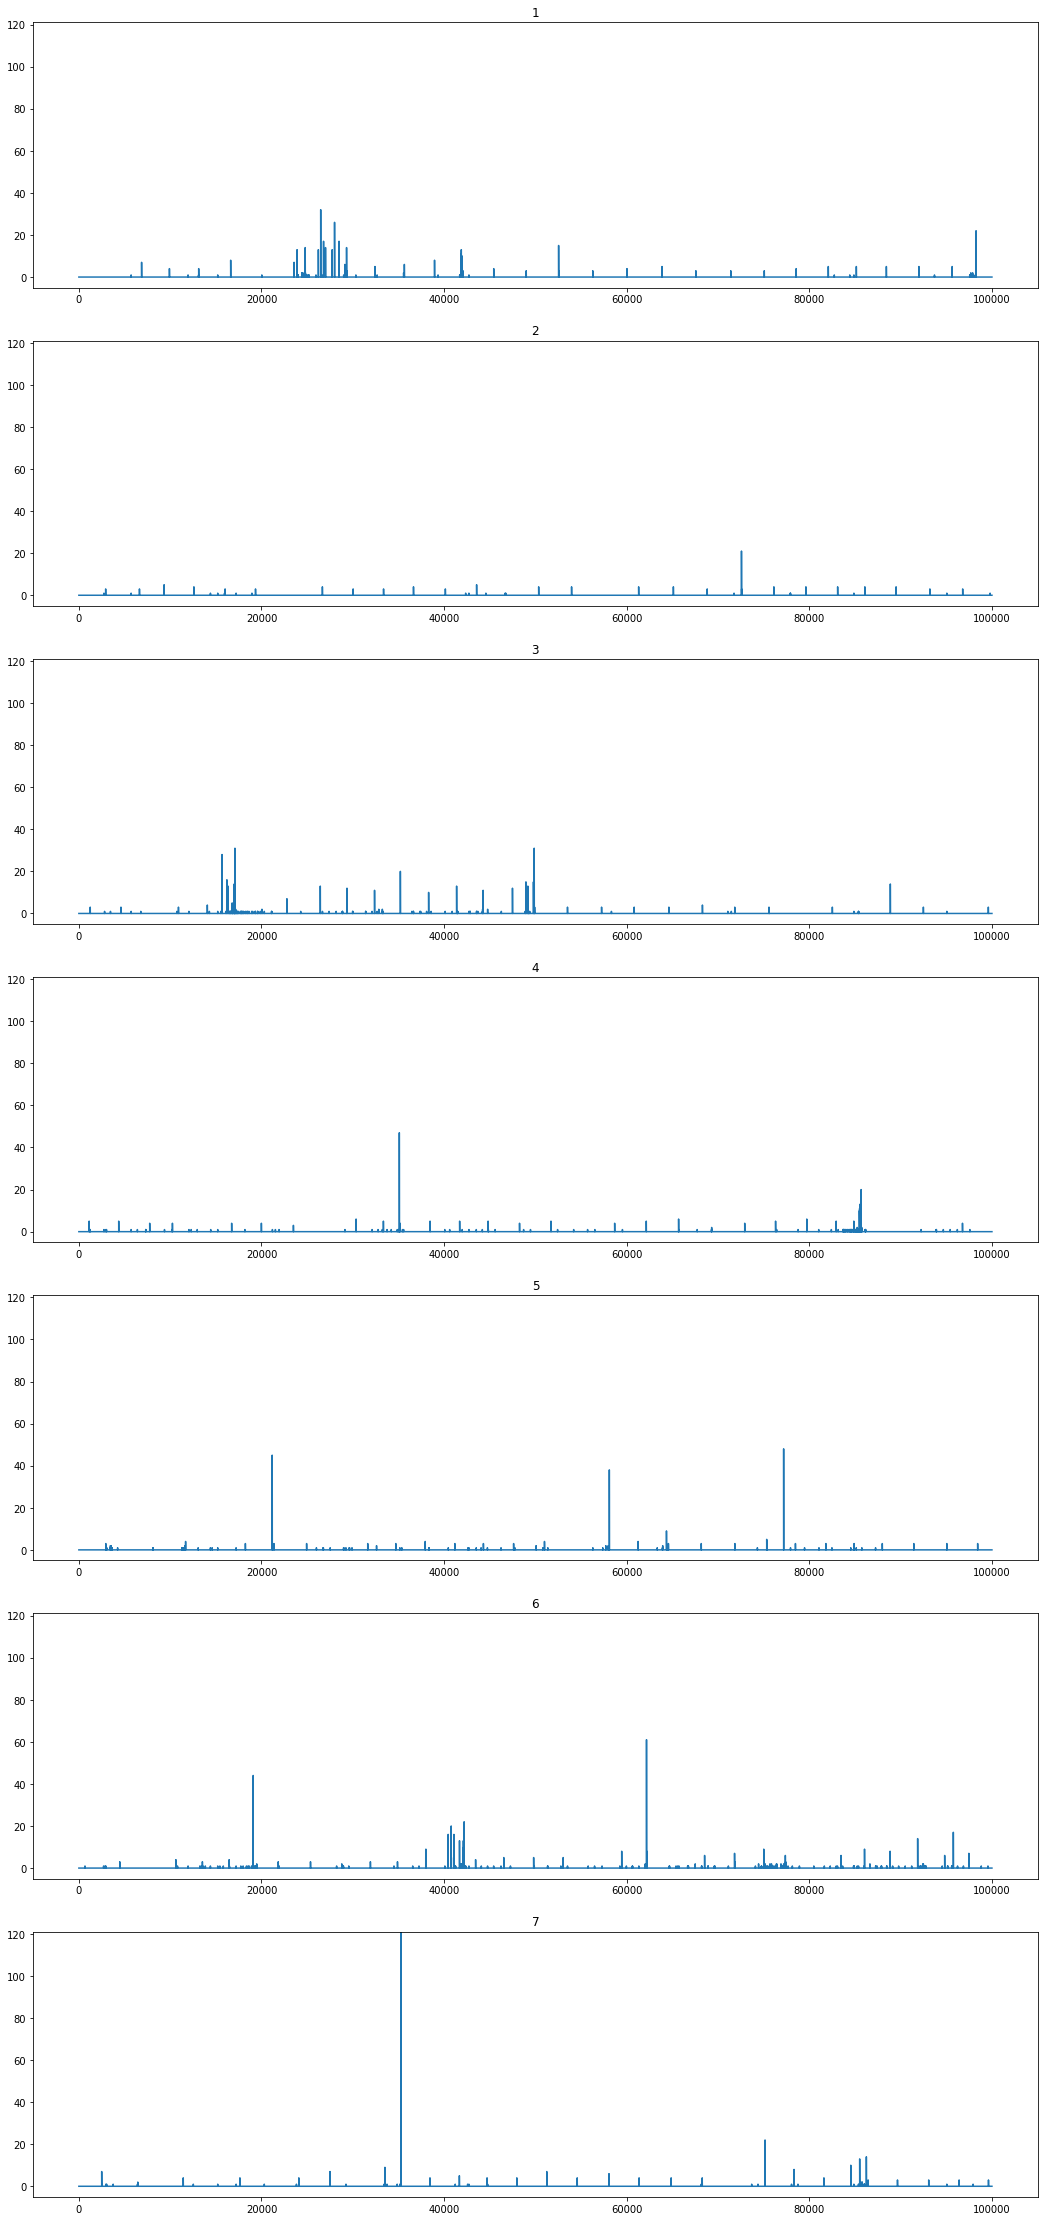

In [204]:
indices, data = get_x_ydict_from_csv('data/hash_erase_real_data_cuckoo_degrees.csv')
keys = list(data.keys())
maximum = 0
for key in keys:
    if max(data[key]) > maximum and key not in []:
        maximum = max(data[key])

fig, plots = plt.subplots(7, 1, figsize=(18, 40))
fig.patch.set_facecolor('xkcd:white')
for i in range(len(keys)):
    plots[i].set_title(keys[i])
    plots[i].plot(indices, data[keys[i]])
    bottom, top = plots[i].get_ylim()
    plots[i].set_ylim(-5, maximum)
plt.savefig('test.png')

## Выводы

* `std::hash_map` не зря в `std`, он крайне хорош при вставке и поиске
* Кукушка удаляет в среднем лучше `std::hash_map`
* Степень палинома в используемой в кукушке хэш-функции конкретно для наших real-life данных оказалась не особо значимой, но в среднем, кажется, с увеличением степени палинома вероятность возникновения "выброса" снижается
* Хэшировать строки - ужасно медленно, если есть способ этого избежать в пракических задачах - этого нужно избегать
* Писать на `C++` очень больно, ~~нужно учить Rust~~, хочу обратно в Питон :(